In [1]:
# -*- coding: utf8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.style.use('seaborn-colorblind')
plt.ion()
plt.rcParams['figure.figsize']  = (18, 10)

# Aula 05 - Probabilidade

**Material adaptado do Professor Pedro Olmo.**

## Objetivos

1. Revisão básica de probabilidade
1. Aprender como filtros levam a um entendimento de probabilidade

## Resultado Esperado

1. Tal aula é a base de diversos modelos e métodos que vamos explorar
1. Nesta, vamos sair um pouco do mundo de EDA. Ainda temos um pouco, mas a aula é mais teórica
1. Aprender como gerar dados sintéticos de diferentes distribuições

# Teoria da Probabilidade

É difícil fazer ciência dos dados sem algum tipo de entendimento de probabilidade e sua matemática. Assim como no nosso tratamento de estatísticas na aula anterior, vamos ser mais breve do que o tópico merece e eliminar muitos dos detalhes técnicos.

Para nossos propósitos, você deve pensar em probabilidade como uma forma de quantificar a incerteza associada a eventos escolhidos de um universo de eventos. Em vez de obter informações técnicas sobre o significado desses termos, pense no rolar de um dado. O universo consiste em todos os resultados possíveis. E qualquer subconjunto desses resultados é um evento; por exemplo, "o dado rola um" ou "o dado rola um número par".

Como notação, escrevemos $P(E)$ para significar "a probabilidade do evento E."

Nós usaremos a teoria da probabilidade para construir modelos. Nós usaremos a teoria da probabilidade para avaliar modelos. Nós vamos usar a teoria da probabilidade em todo o lugar.

Poderíamos, se assim desejássemos, aprofundar-nos na filosofia do que a teoria da probabilidade significa. (Isso é feito melhor com cerveja). Não faremos isso.

## Dependência e Independência

À grosso modo, dizemos que dois eventos $E$ e $F$ são dependentes se ao sabermos algo sobre se E aconteceu nos dá informações sobre se F acontece (e vice-versa). Caso contrário, eles são independentes.

Por exemplo, se virarmos uma moeda justa duas vezes, saber se o primeiro lançamento é "Cara" não nos dá nenhuma informação sobre se o segundo lançamento é "Coroa". Esses eventos são independentes. Por outro lado, saber se o primeiro lançamento é "Cara" certamente nos dá informações sobre se ambos os lançamentos são "Coroa". (Se o primeiro lançamento é "Cara", então definitivamente não é o caso de ambas as viradas serem "Coroa".) Esses dois eventos são dependentes.

Matematicamente, dizemos que dois eventos $E$ e $F$ são independentes se a probabilidade de ambos acontecerem é o produto das probabilidades que cada um acontece:

$P(E,F) = P(E)P(F)$

No exemplo acima, a probabilidade de "primeiro dar Cara" é $1/2$, e a probabilidade de "ambos darem Coroa" é $1/4$, mas a probabilidade de "primeiro dar Cara" e "ambos darem Coroa" é 0.

Vamos inicar o notebook simulando uma moeda. O módulo random do numpy gera números aleatórios.

In [3]:
np.random.rand()

0.4554983543744786

In [4]:
1 + np.random.rand() * 7

6.1999291619529755

In [5]:
# podemos simular um dado
round(1 + np.random.rand() * 5)

5

In [6]:
round(0.5)

0

In [7]:
?np.random

In [8]:
# mas é melhor usar o método correto
np.random.randint(1, 7)

4

Agora vamos gerar 10000 jogadas de um dado. Qual é o valor esperado em cada célula da contagem?

In [9]:
count = np.zeros(6)
for _ in range(10000):
    dado = np.random.randint(1, 7)
    count[dado - 1] += 1

In [10]:
pd.Series(count)

0    1718.0
1    1681.0
2    1644.0
3    1692.0
4    1611.0
5    1654.0
dtype: float64

Text(0.5, 0, 'Valor do dado - x')

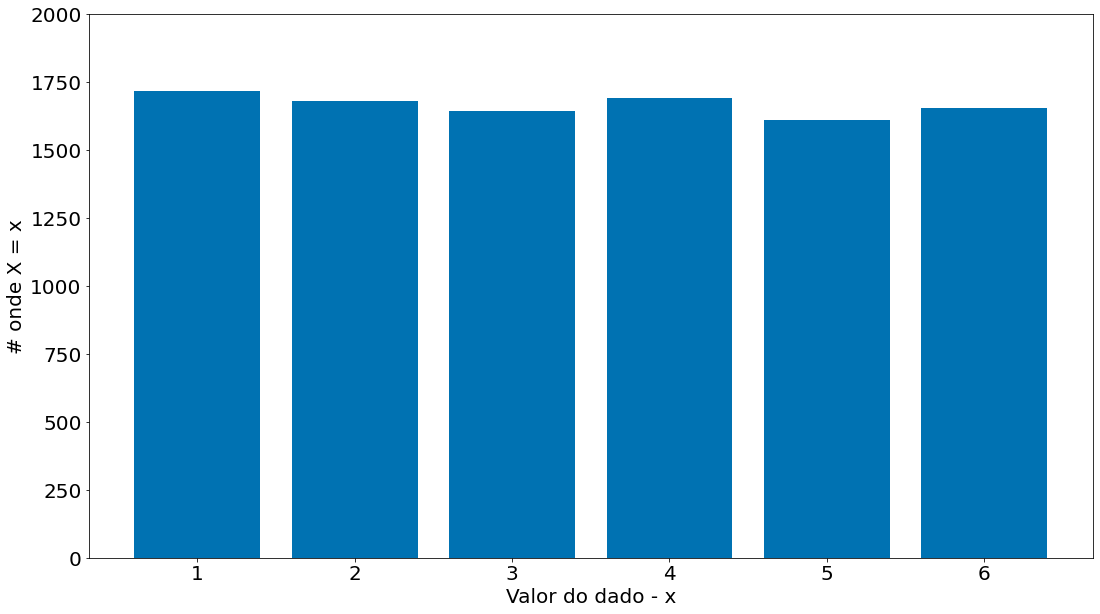

In [11]:
plt.bar(np.arange(1, 7), count)
plt.ylim(0, 2000)
plt.ylabel('# onde X = x')
plt.xlabel('Valor do dado - x')

Podemos converter para probabilidades

In [12]:
prob = count / count.sum()
prob

array([0.1718, 0.1681, 0.1644, 0.1692, 0.1611, 0.1654])

Text(0.5, 0, 'Valor do dado - x')

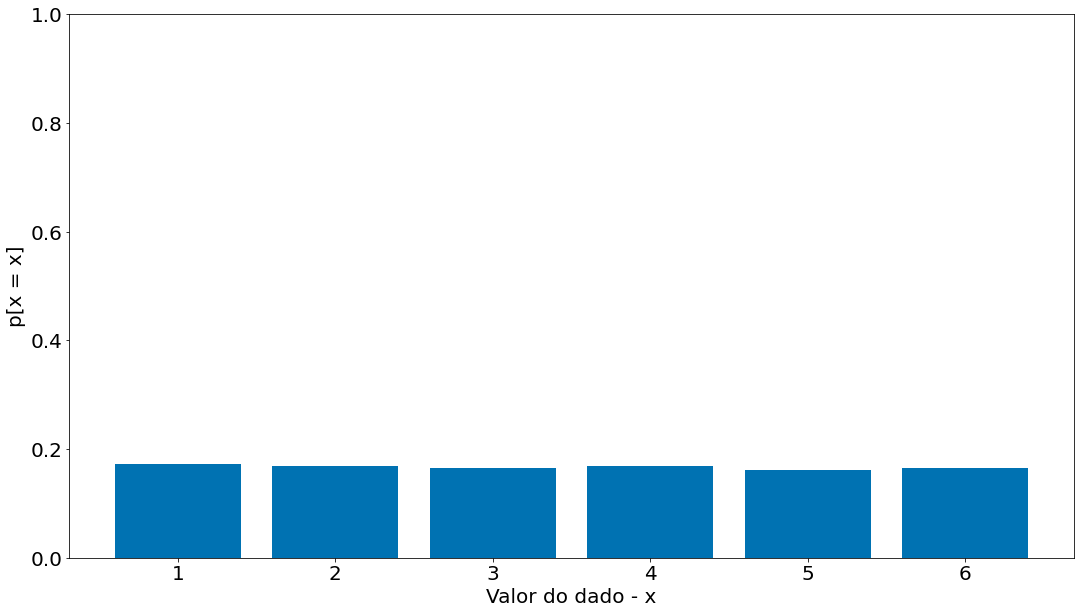

In [13]:
plt.bar(np.arange(1, 7), prob)
plt.ylim(0, 1)
plt.ylabel('p[x = x]')
plt.xlabel('Valor do dado - x')

Text(0.5, 0, 'Valor do dado - x')

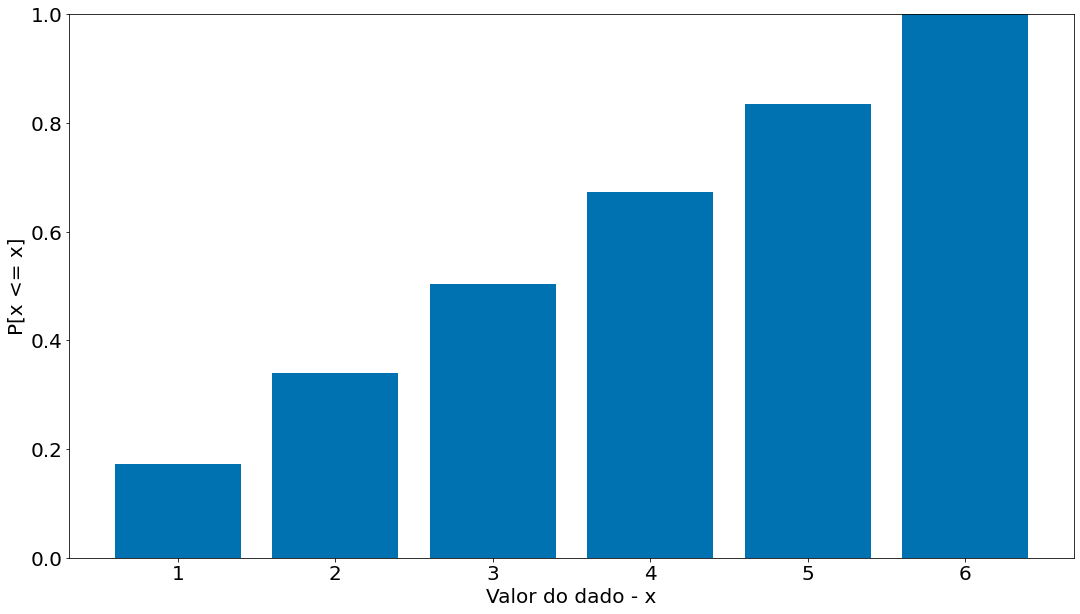

In [14]:
plt.bar(np.arange(1, 7), prob.cumsum())
plt.ylim(0, 1)
plt.ylabel('P[x <= x]')
plt.xlabel('Valor do dado - x')

## Leis dos Grandes Números

Observe no código abaixo como a probabilidade vai estabilizando com mais chamadas. Ou seja, pequenas amostras tem muita incerteza. Ao aumentar o número de amostras chegamos perto da probabilidade real `P(D=6)`.

Tal efeito é conhecido como a Lei dos Grandes Números. Com mais amostras, aproximamos do valor médio real. Aqui o valor médio significa: valor esperado de P(D=6).

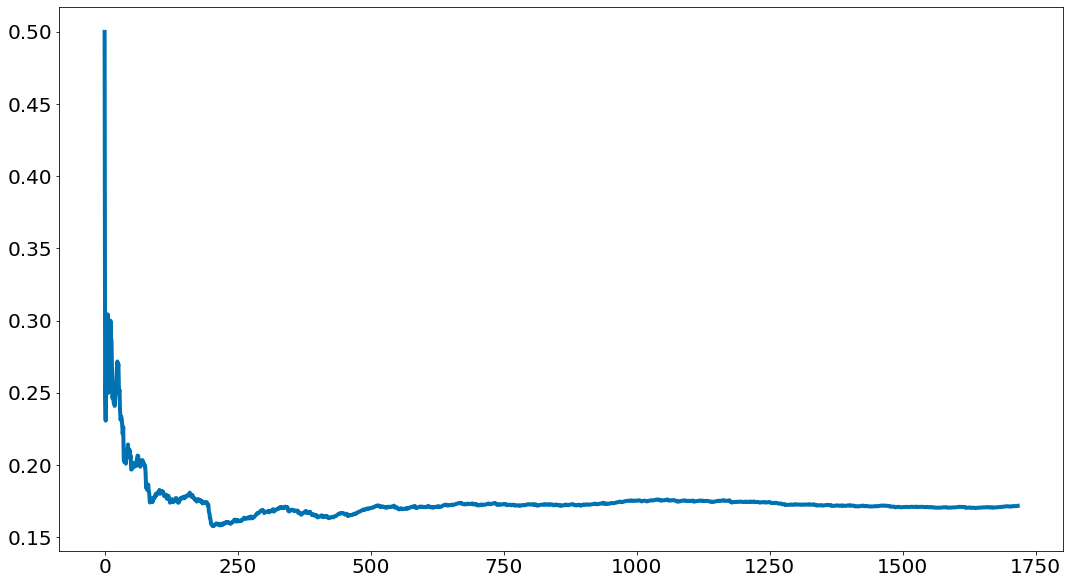

In [15]:
data = []
count_6 = 0
for i in range(10000):
    dado = np.random.randint(1, 7)
    if dado == 6:
        count_6 += 1
        prob_6 = count_6 / (i + 1)
        data.append(prob_6)
p6 = pd.Series(data)
plt.plot(p6)

## Probabilidade Condicional

Quando dois eventos $E$ e $F$ são independentes, então, por definição, temos:

$P(E,F) = P(E)P(F)$

Se eles não são necessariamente independentes (e se a probabilidade de $F$ não é zero), então definimos a probabilidade de $E$ "condicional em F" como:

$P(E|F) = \frac{P(E,F)}{P(F)}$

Você deve pensar nisso como a probabilidade de que $E$ aconteça, dado que sabemos que $F$ acontece. Nós frequentemente reescrevemos isso como:

$P(E,F) = P(E|F)P(F)$

E quando $E$ e $F$ são independentes, você pode verificar que:

$P(E|F) = P(E)$

que é a maneira matemática de expressar que saber que $F$ ocorreu não nos dá nenhuma informação adicional sobre se $E$ ocorreu.

Um exemplo complicado comum envolve uma família com dois filhos de sexo desconhecido.

Se assumirmos que:
1. Cada criança tem a mesma probabilidade de ser um menino ou uma menina;
2. O sexo do segundo filho é independente do sexo do primeiro filho, então o evento "sem meninas" tem probabilidade de $1/4$, o evento "uma menina, um menino" tem probabilidade $1/2$ e o evento "duas meninas" tem probabilidade $1/4$.

Agora podemos perguntar: qual é a probabilidade do evento "ambas as crianças são meninas" ($B$) condicional ao evento "a criança mais velha é uma menina" ($G$)? Usando a definição de probabilidade condicional:

$P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)P(G)}{P(G)} = 1/2$

já que o evento $B$ e $G$, ou $(B,G)$ ("as duas crianças são meninas *e* a mais velha é uma menina") é apenas o evento $B$. Uma vez que você sabe que as duas crianças são meninas, é necessariamente verdade que a criança mais velha é uma menina. Neste caso, a independencia é simples de ver.

Muito provavelmente este resultado está de acordo com a sua intuição.

Poderíamos também perguntar sobre a probabilidade do evento "ambas as crianças serem meninas" ($B$) condicionadas ao evento "pelo menos uma das crianças é uma menina" $(L)$. Surpreendentemente, a resposta é diferente de antes!

Como antes, o evento $B$ e $L$, ou $(B,L)$, ("as duas crianças são meninas *e* pelo menos uma das crianças é uma menina") é apenas o evento $B$. Por que? Ora, se as duas crianças são meninas, então pelo menos uma é menina. Sabemos que a probabilidade do evento $B$ é $1/4$. Qual é a probabilidade do evento $L$? Seja $F$ e $M$ os sexos das crianças, o universo de possibilidades é:

$(F, F), (F, M), (M, F), (M, M)$,

ou seja, apenas uma das quatro possibilidades não está em $L$, que tem probabilidade de $3/4$.

Assim:

$P(B|L) = P(B,L)/P(L) = P(B)/P(L) = \frac{1/4}{3/4} = 1/3$

Em suma, se tudo o que você sabe é que pelo menos uma das crianças é uma menina, então é duas vezes mais provável que a família tenha um menino e uma menina do que tenha duas garotas.

Podemos verificar isso "gerando" muitas famílias:

In [16]:
def random_kid():
    return np.random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

for _ in range(10000):
    older = random_kid()
    younger = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)


P(both | older): 0.49788604791624724
P(both | either):  0.3293819925412893


Podemos resolver de forma mais simples com numpy + pandas

In [17]:
X = np.random.choice(["boy", "girl"], size=10000).reshape((5000, 2))
X

array([['boy', 'boy'],
       ['boy', 'boy'],
       ['boy', 'boy'],
       ...,
       ['girl', 'girl'],
       ['boy', 'boy'],
       ['girl', 'girl']], dtype='<U4')

In [18]:
df = pd.DataFrame(X, columns=['first', 'second'])
df

,first,second
0,boy,boy
1,boy,boy
2,boy,boy
3,boy,boy
4,boy,boy
...,...,...
4995,girl,boy
4996,girl,girl
4997,girl,girl
4998,boy,boy


In [19]:
filtro = df[df['second'] == 'girl']
len(filtro)

2471

In [20]:
(filtro['first'] == 'girl').sum() / 2463

0.49127080795777506

In [21]:
df[df['second'] == 'girl'].groupby('first').size()

first
boy     1261
girl    1210
dtype: int64

Outro exemplo interessante, que foge confunde um pouco no uso da probabilidade condicional, é o [Problema de Monty Hall](https://pt.wikipedia.org/wiki/Problema_de_Monty_Hall), que ficou popular no Brasil a partir do quadro [A Porta dos Desesperados](https://www.youtube.com/watch?v=VCPBvKYqm5U) apresentado pelo humorista Sérgio Mallandro. Nesse quadro, o participante tinha que escolher uma de três portas para abrir. Em uma delas há um prêmio, nas outras duas um monstro. Depois de feita a escolha da porta inicial, o apresentador abre uma das duas portas que não foram escolhidas pelo participante e oferece a ele a chance de trocar a sua escolha inicial pela outra porta. O que ele deve fazer?

Seja o evento $A$ o prêmio e o evento $B$ o monstro, qual a probabilidade da escolha inicial do participante ser o prêmio?

$P(A) = 1/3$

E de ser o monstro?

$P(B) = 1 - P(A) = 2/3$

Depois que o apresentador revela um monstro em uma das portas restantes, qual a probabilidade da que restou ser a porta do prêmio? Note que o apresentador irá, necessariamente, revelar uma porta com um monstro. Então, o jogo na verdade é outro: o prêmio pode estar na escolha inicial do participante ou nas duas portas que restam ao apresentador. E qual a probabilidade do prêmio estar em uma das duas portas que restaram para o apresentador? A mesma probabilidade do prêmio não estar na porta escolhida inicialmente pelo participante, que é de $2/3$. Assim, o participante, se quiser aumentar as chances de ganhar o prêmio, deve ser optar por trocar a sua escolha pela porta restante do apresentador.

Se você ainda está com dúvidas, pense no mesmo problema, mas com 1000 portas, em que o participante escolhe uma delas inicialmente e o apresentador elimina todas as outras e deixa apenas uma. O apresentador não funciona como a sorte, ele vai, *com certeza*, eliminar portas que contenham monstros.

## Teorema de Bayes

Um dos melhores amigos do cientista de dados é o Teorema de Bayes, que é uma maneira de "inverter" as probabilidades condicionais. Digamos que precisamos saber a probabilidade de algum evento $E$ ocorrer condicionado a ocorrência de algum outro evento $F$. O problema é que nós só temos informações sobre a probabilidade de $F$ condicional a $E$ ocorrer. Usando a definição de probabilidade condicional duas vezes, temos que:

$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)}$

O evento $F$ pode ser dividido em dois eventos mutualmente exclusivos "$F$ e $E$" e "$F$ e não $E$". Se a gente escrever $\neg E$ para "não $E$" (isto é, "$E$ não ocorre"), então:

$P(F) = P(F,E) + P(F,\neg E)$

tal que:

$P(E|F) = \frac{P(F|E)P(E)}{P(F|E)P(E) + P(F|\neg E)P(\neg E)}$, 

que é como o Teorema de Bayes é normalmente descrito.

Este teorema costuma ser usado para demonstrar por que os cientistas de dados são mais inteligentes que os médicos. Imagine uma certa doença que afeta 1 em cada 10.000 pessoas. E imagine que há um teste para esta doença que dá o resultado correto ("doente" se você tem a doença, "não-doente" se você não o tem) 99% do das vezes.

O que significa um teste positivo? Vamos usar $T$ para o evento "seu teste é positivo" e $D$ para o evento "você tem a doença". Então, o Teorema de Bayes diz que a probabilidade de você ter a doença, condicionada a testes positivos, é:

$P(D|T) = \frac{P(T|D)P(D)}{P(T|D)P(D) + P(T|¬D)P(¬D)}$

Sabemos que $P(T|D)$, a probabilidade de que alguém com a doença seja positiva, é $0.99$. $P(D)$, a probabilidade de que qualquer pessoa tenha a doença, é $1/10000 = 0.0001$. $P(T|\neg D)$, a probabilidade de que alguém sem a doença seja positiva, é de $0.01$. E $P(\neg D)$, a probabilidade de que qualquer pessoa não tenha a doença é de $0.9999$. Se você substituir esses números no Teorema de Bayes, você encontrará

$P(D|T) = 0.98\%$

Ou seja, menos de 1% das pessoas que testam positivo realmente têm a doença.

Isso pressupõe que as pessoas façam o teste mais ou menos ao acaso. Se apenas as pessoas com certos sintomas fizessem o teste, teríamos que condicionar o evento “teste e sintomas positivos” e o número provavelmente seria muito maior.

Embora esse seja um cálculo simples para um cientista de dados, a maioria dos médicos adivinhará que $P(D|T)$ é de aproximadamente $1$.

Uma maneira mais intuitiva de ver isso é imaginar uma população de 1 milhão de pessoas. Você esperaria que 100 deles tivessem a doença e 99 desses 100 tivessem um teste positivo. Por outro lado, você esperaria que 999.900 deles não tivessem a doença e 9.999 deles tivessem um teste positivo. O que significa que você espera que apenas 99 de (99 + 9999) testadores positivos realmente tenham a doença.

## Variáveis aleatórias

Uma variável aleatória é uma variável cujos valores possíveis têm uma distribuição de probabilidade associada. Uma variável aleatória muito simples é igual a $1$ se um lançamento de moeda der "cara" e $0$ se der "coroa". Uma variável mais complicada poderia medir o número de "caras" observadas quando uma moeda é lançada $10$ vezes ou um valor é escolhido no `range(10)`, em que cada número é igualmente provável.

A distribuição associada fornece as probabilidades de que a variável receba cada um dos seus valores possíveis. A variável *lançamento de moeda* é igual a $0$ com probabilidade $0.5$ e $1$ com probabilidade $0.5$. A variável do `range(10)` tem uma distribuição que atribui a probabilidade $0.1$ a cada um dos números de $0$ a $9$.

Falaremos às vezes sobre o valor esperado de uma variável aleatória, que é a média de seus valores ponderados por suas probabilidades. A variável *lançamento de moeda* tem um valor esperado de 

$E($ *lançamento de moeda* $) = 1/2 = 0 \times 1/2 + 1 \times 1/2$,

enquanto a variável aleatória `range(10)` tem um valor esperado de

$E($ `range(10)` $) = 4.5 = \sum _{i=0}^{9}{(i \times 0.1)}$.

Variáveis aleatórias podem ser *condicionadas* a eventos, assim como podem outros eventos. Voltando ao exemplo dos dois filhos, mencionado anteriormente, se $X$ for a variável aleatória que representa o número de garotas, $X$ será igual a $0$ com probabilidade $1/4$, $1$ com probabilidade $1/2$ e $2$ com probabilidade $1/4$.

Podemos definir uma nova variável aleatória $Y$ que dá o número de meninas condicionado a pelo menos uma das crianças ser uma menina. Então $Y$ é igual a $1$ com probabilidade $2/3$ e $2$ com probabilidade $1/3$. Uma variável $Z$, que é o número de garotas condicionado a criança mais velha ser uma garota é igual a $1$ com probabilidade $1/2$ e $2$ com probabilidade $1/2$.

Na maioria das vezes, estaremos usando variáveis aleatórias implicitamente naquilo que fazemos sem chamar atenção especial a elas. Mas se você olhar profundamente, verá.

## Distribuições Contínuas

Um *lançamento de moeda* corresponde a uma distribuição discreta - uma que associa probabilidade positiva a resultados discretos. Frequentemente, queremos modelar distribuições em um contínuo de resultados. (Para nossos objetivos, esses resultados sempre serão números reais, embora isso nem sempre seja o caso na vida real.) Por exemplo, a distribuição uniforme coloca peso igual em todos os números entre 0 e 1.

Como há infinitos números entre 0 e 1, isso significa que o peso atribuído a pontos individuais deve ser necessariamente zero. Por esta razão, nós representamos uma distribuição contínua com uma *função de densidade de probabilidade*, ou *probability density function (pdf)*, de modo que a probabilidade de ver um valor em um determinado intervalo seja igual à integral da função de densidade durante o intervalo.

Se seu cálculo integral estiver enferrujado, uma maneira mais simples de entender isso é que, se uma distribuição tiver a função densidade $f$, a probabilidade de ver um valor entre $x$ e $x + h$ é aproximadamente $h \times f(x)$ se $h$ for pequeno.

A função de densidade para a distribuição uniforme é simplesmente:

In [22]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

Text(0, 0.5, 'P(X = x)')

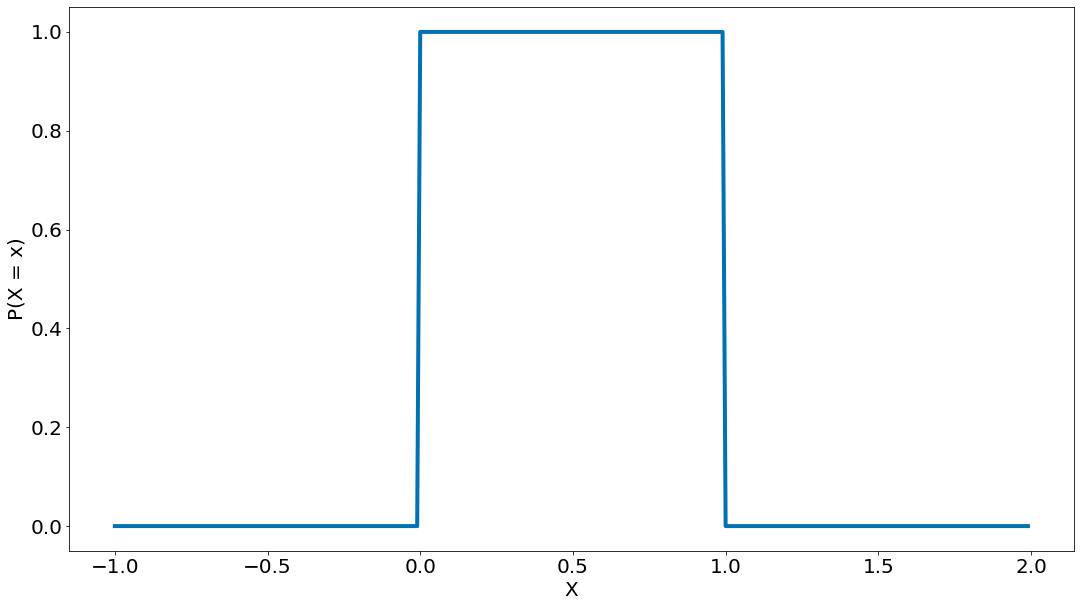

In [23]:
x = np.arange(-1, 2.0, 0.01)
pdf_x = [uniform_pdf(i) for i in x]
plt.plot(x, pdf_x)
plt.xlabel('X')
plt.ylabel('P(X = x)')

A probabilidade de que uma variável aleatória que siga essa distribuição esteja entre $0.2$ e $0.3$ é de $1/10$, como você esperaria. O `random.random()` do Python é uma variável (pseudo) aleatória com uma densidade uniforme.

Frequentemente estaremos mais interessados na *função de distribuição cumulativa*, ou *cumulative distribution function* (cdf), que fornece a probabilidade de que uma variável aleatória seja menor ou igual a um determinado valor. Não é difícil criar a função de distribuição cumulativa para a distribuição uniforme:

In [24]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

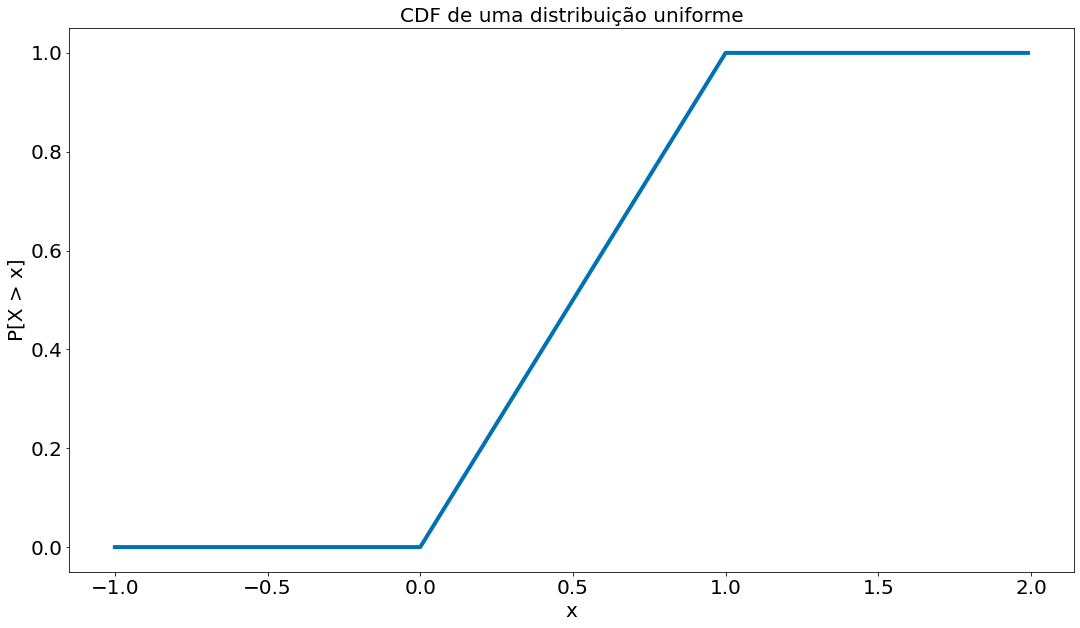

In [25]:
x = np.arange(-1, 2.0, 0.01)
cdf_x = [uniform_cdf(i) for i in x]
# cria um gráfico de linhas, com os anos no eixo x e o pib no eixo y
plt.plot(x, cdf_x, linestyle='solid')

plt.title('CDF de uma distribuição uniforme')
plt.ylabel('P[X > x]')
plt.xlabel('x')

plt.show()

## A distribuição normal

A distribuição normal é a rainha das distribuições. É a clássica distribuição da curva em forma de sino e é completamente determinada por dois parâmetros: sua média $\mu$ (mu) e seu desvio padrão $\sigma$ (sigma). A média indica onde o sino está centrado e o desvio padrão indica o quão "largo" ele é. A sua função de distribuição é:

$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}, $$

que pode ser implementada como:

In [26]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = np.sqrt(2 * np.pi)
    return (np.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

A seguir, plotamos algumas dessas PDFs para ver como eles se parecem:

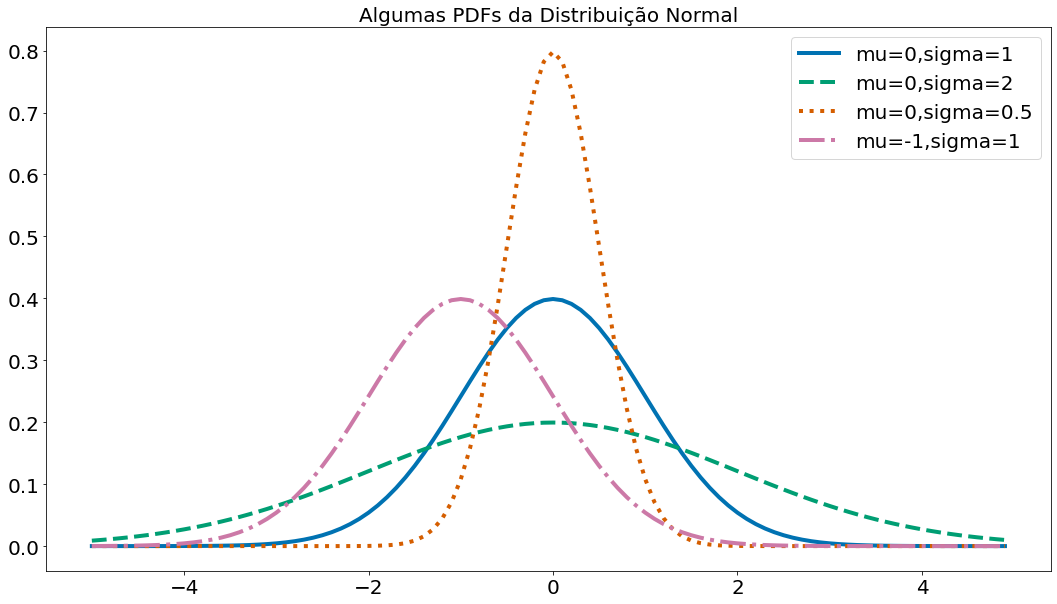

In [27]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Algumas PDFs da Distribuição Normal")
plt.show()

Quando $\mu = 0$ e $\sigma = 1$, a distribuição é chamada de distribuição normal padrão. Se $Z$ é uma variável aleatória normal padrão, então acontece que:

$X = \sigma Z + \mu$

também é normal, mas com média $\mu$ e desvio padrão $\sigma$. Inversamente, se $X$ é uma variável aleatória normal com média $\mu$ e desvio padrão $\sigma$,

$Z = (X-\mu)/\sigma$

é uma variável normal padrão.

A função de distribuição cumulativa para a distribuição normal não pode ser escrita de maneira "elementar". Ela é definida como:

$$F(x)=\Phi \left({\frac {x-\mu }{\sigma }}\right)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right],$$

em que

$$\Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]$$

e

$$\operatorname {erf} (x)={\frac {2}{\sqrt {\pi }}}\int _{0}^{x}e^{-t^{2}}\,dt$$

Neste curso, não nos preocuparemos muito sobre os detalhes dessas funções. Se quiser saber mais sobre elas, clique [aqui](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal) ou [aqui](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_erro). Em Python, podemos escrevê-la usando diretamente o `math.erf`:

In [28]:
from scipy.special import erf
def normal_cdf(x, mu=0,sigma=1):
    return (1 + erf((x - mu) / np.sqrt(2) / sigma)) / 2

Abaixo plotamos algumas CDFs de distribuições normais:

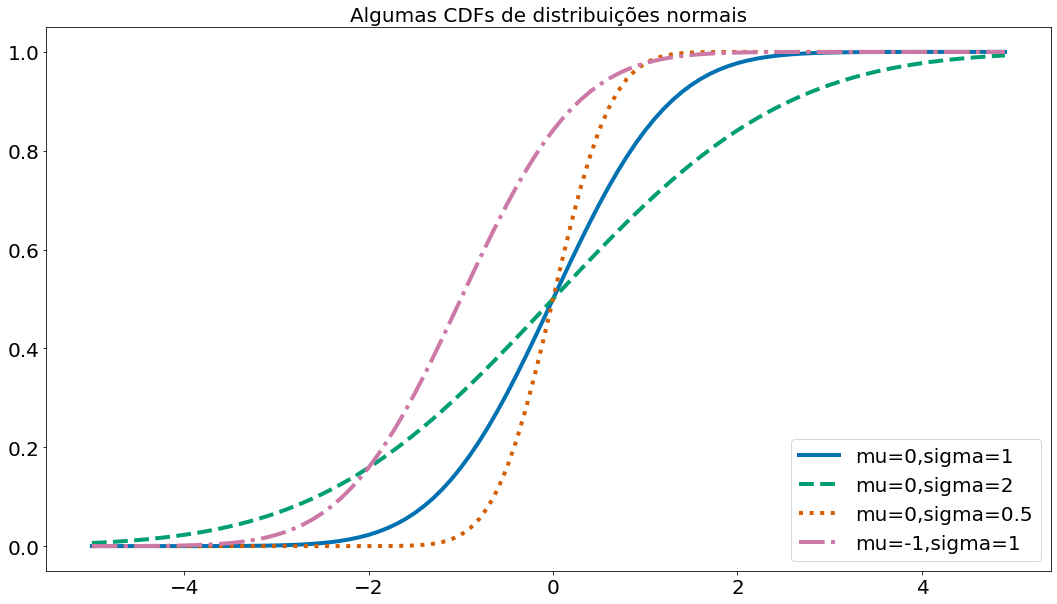

In [29]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Algumas CDFs de distribuições normais")
plt.show()

Às vezes, precisamos inverter a `normal_cdf` para encontrar o valor correspondente a uma probabilidade especificada. O inverso da CDF da distribuição normal é:

$$F^{-1}(x) =\mu +\sigma {\sqrt {2}}\mathrm {erf} ^{-1}(2p-1),\quad p\in (0,1)$$

[Não há uma maneira simples de calcular o inverso da funçao *erf*](https://stackoverflow.com/questions/42381244/pure-python-inverse-error-function), mas como a `normal_cdf` é contínua e estritamente crescente, podemos usar uma pesquisa binária:

In [30]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z    

Se preferir, pode usar também a fórmula fechada usando a função `erfinv` do `scipy`:

In [31]:
from scipy.special import erfinv
import math
def inverse_normal_cdf(p, mu=0, sigma=1):
    return mu + sigma*math.sqrt(2)*erfinv(2*p - 1)

In [32]:
print(inverse_normal_cdf(0.23, 10, 2))

8.522306301629573


Funções inversas são úteis para simular dados. Isto é, vamos usar a função inversa para simular uma normal 0, 1. O algoritmo funciona da seguinte forma:

1. Simule um número uniforme entre u = rand([0, 1])
2. Inverta a função CDF da sua distribuição. Note que o valor da mesma é entre [0, 1]
3. Selecione o valor de x correspondente, ou seja, aplique a inversa(u)
4. Você acaba de gerar número aleatório que segue uma normal!

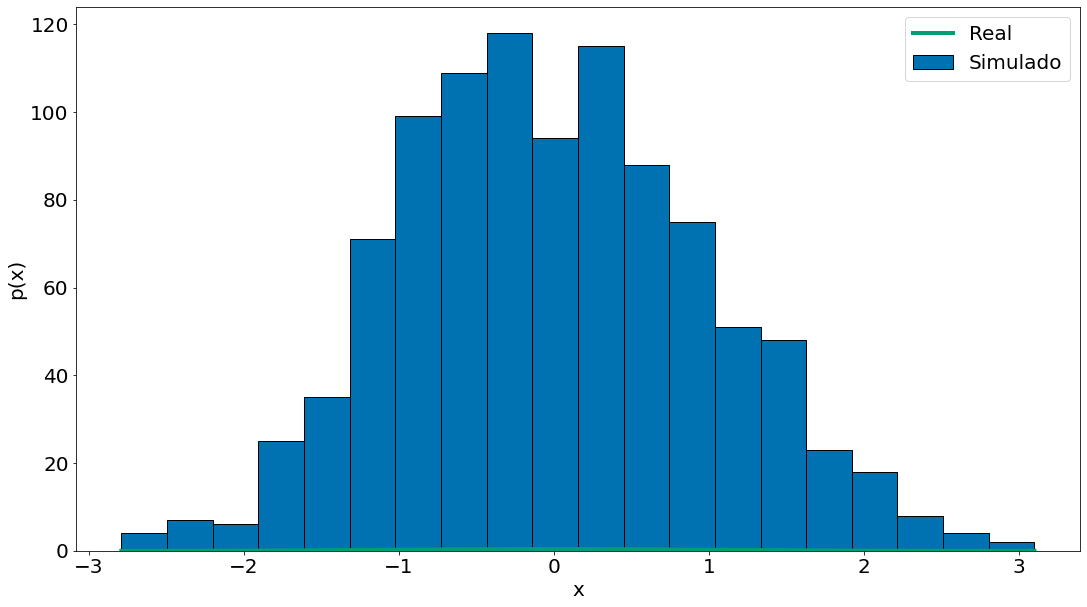

In [33]:
x = np.random.rand(1000)
y = inverse_normal_cdf(x)
plt.hist(y, bins=20, label='Simulado', edgecolor='k')
x_lin = np.linspace(y.min(), y.max())
plt.plot(x_lin, normal_pdf(x_lin), label='Real')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

# Brincando com dados reais

Vamos brincar um pouco com dados reais. Em particular, vamos olhar para as músicas mais populares da billboard por semana. Uma característica interessante desses dados é que os mesmos contém diversas colunas que capturam atríbutos da música. Por exemplo, se a música é dançante!

## Billboard

In [34]:
# Lendo os dados. O arquivo está códificado com iso8859. Temos que falar isso para o
# pandas. Além do mais, a pessoa quem organizou os dados colocou unknown quando um valor
# não existe!
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/06-Probabilidade/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')
df = df.dropna()
df.head(5)
df.columns

Index(['date', 'year', 'title', 'simple_title', 'artist', 'main_artist',
       'peak_pos', 'last_pos', 'weeks', 'rank', 'change', 'spotify_link',
       'spotify_id', 'video_link', 'genre', 'broad_genre', 'analysis_url',
       'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'time_signature', 'danceability', 'key',
       'duration_ms', 'loudness', 'valence', 'mode', 'lyrics'],
      dtype='object')

Text(0, 0.5, 'P(X = x)')

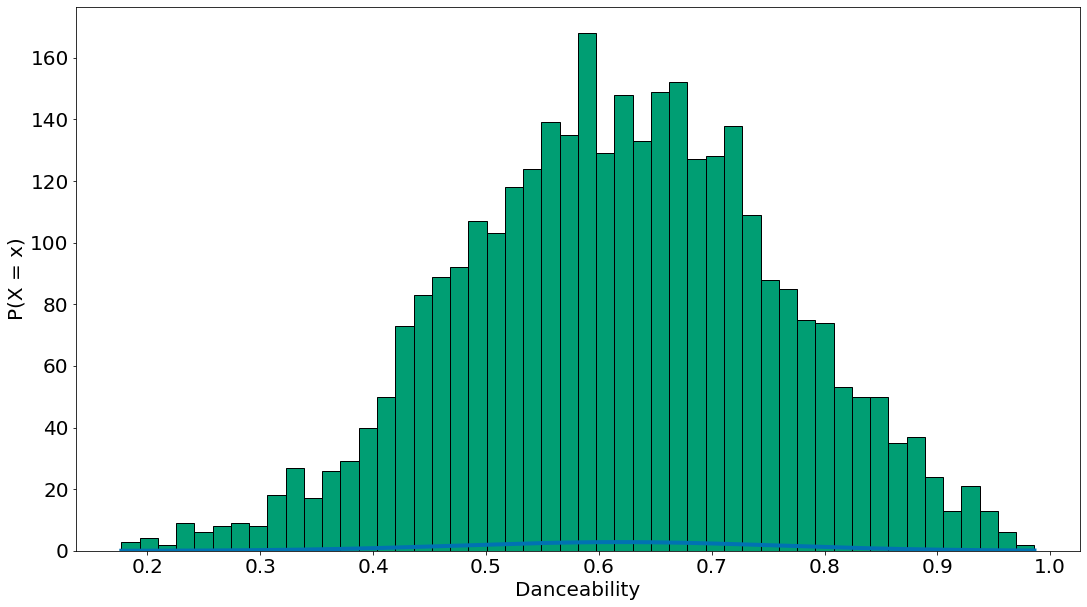

In [35]:
x = np.unique(df['danceability'])
y = normal_pdf(x,
               df['danceability'].mean(),
               df['danceability'].std())
plt.plot(x, y)
plt.hist(df['danceability'], bins=50, edgecolor='k')
plt.xlabel('Danceability')
plt.ylabel('P(X = x)')

Por fim, vamos condicionar nas músicas que não são em 4 por 4. Isso mostra uma forma de aplicar o teorema de Bayes em dados como estes. Aqui, $P(F)$ vai ser as músicas em um tempo diferente do 4/4. $P(F|E)$ vem do histograma.

$$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)}.$$

Text(0, 0.5, 'P(X = x)')

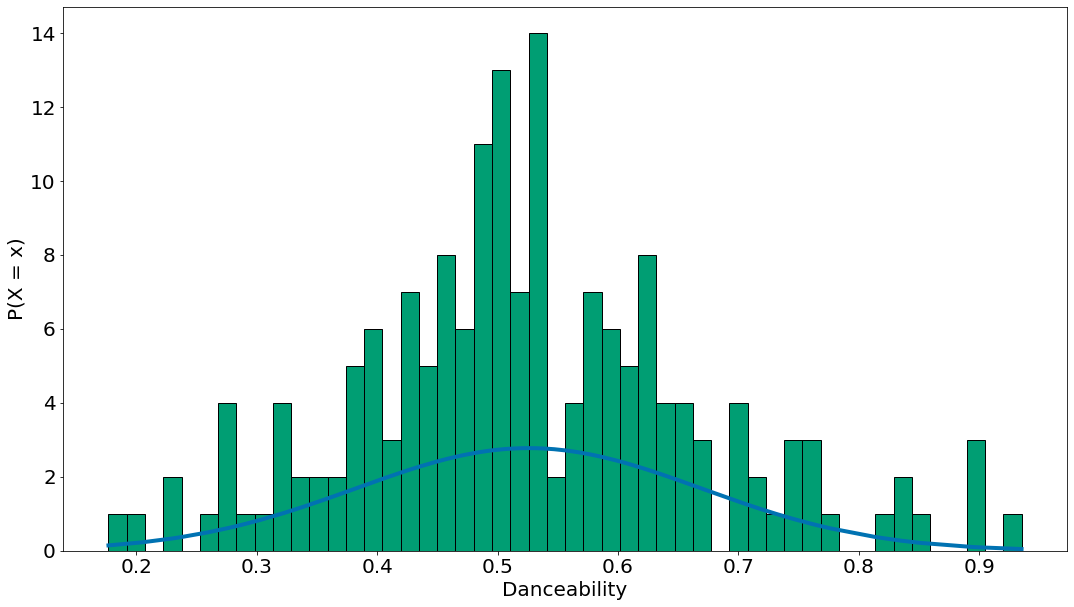

In [36]:
nao_4p4 = df[df['time_signature'] != 4]
x = np.unique(nao_4p4['danceability'])
y = normal_pdf(x,
               nao_4p4['danceability'].mean(),
               nao_4p4['danceability'].std())
plt.plot(x, y)
# A normalização é apenas nos dados não 4/4! Por isso filtramos e aplicamos bayes.
plt.hist(nao_4p4['danceability'], bins=50, edgecolor='k')
plt.xlabel('Danceability')
plt.ylabel('P(X = x)')

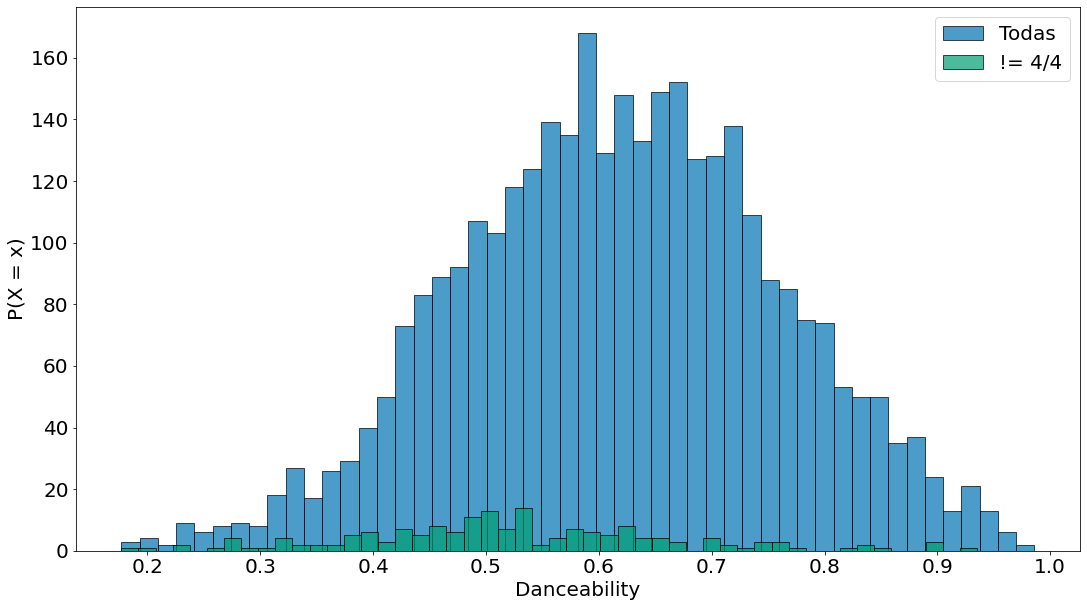

In [37]:
# Comparando as duas
plt.hist(df['danceability'], bins=50, alpha=0.7, label='Todas', edgecolor='k')
plt.hist(nao_4p4['danceability'], bins=50, alpha=0.7, label='!= 4/4', edgecolor='k')
plt.xlabel('Danceability')
plt.ylabel('P(X = x)')
plt.legend()

## Bikes

Agora vamos brincar um pouco com dados de compartilhamento de bicicletas. Em particular, vamos começar com uma exploração do teorema e bayes. No geral, os eventos que estamos observando são mapeados para colunas das nossas tabelas. Ou seja, $E$ e $F$ capturam variáveis ou features dos nossos dados. Vamos olhar para uma base bem interessante de compartilhamento de bicicletas na cidade de San Francisco. Observe como temos variáveis de tipos distintos (categóricas e numéricas).

In [38]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/06-Probabilidade/bike-sharing.csv', index_col=0)
df.head(5)

,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
Trip ID,,,,,,,,,,
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


Note que o resultado final da distribuição do teorema de Bayes é uma distribuição de probabilidade. Portando, temos que pegar dois tipos de eventos, vamos escolher: `Start Station` e `End Station`. Voltando para equação, como podemos capturar $P(E,F)$? Vamos primeiro ver as estações mais populares. Sendo, $F$ o Start Terminal. Podemos:

$$P(E|F) = \frac{P(E,F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)}.$$

In [39]:
F = df['Start Station']
df.groupby('Start Station').size().sort_values()[::-1]

Start Station
San Francisco Caltrain (Townsend at 4th)         26304
San Francisco Caltrain 2 (330 Townsend)          21758
Harry Bridges Plaza (Ferry Building)             17255
Temporary Transbay Terminal (Howard at Beale)    14436
Embarcadero at Sansome                           14158
                                                 ...  
Mezes Park                                         212
Redwood City Medical Center                        150
San Mateo County Center                            127
Redwood City Public Library                        118
Franklin at Maple                                   81
Length: 70, dtype: int64

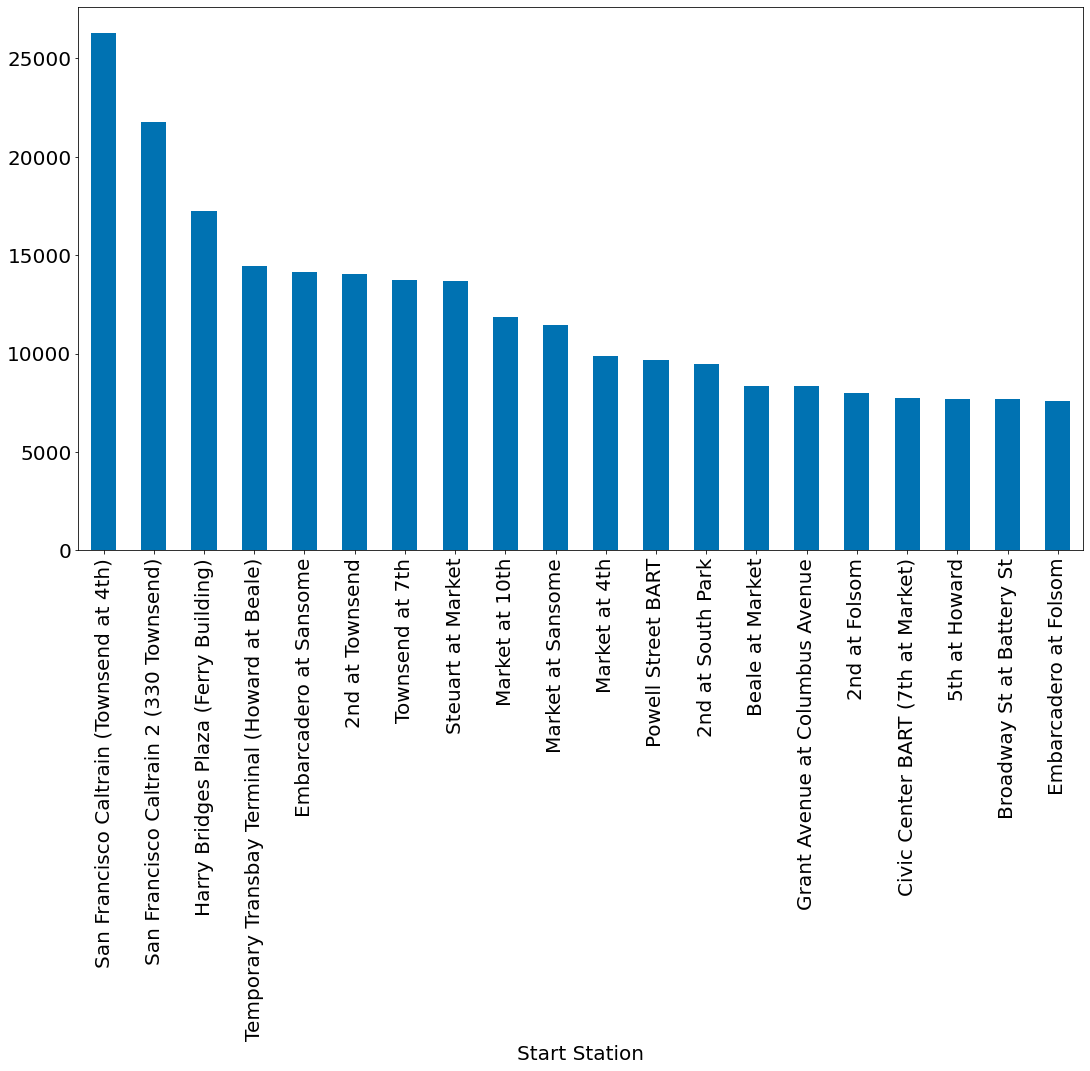

In [40]:
df.groupby('Start Station').size().sort_values()[::-1][:20].plot.bar()

Qual a probabilidade de uma corridia iniciar na primeira estação mais popular e terminar na segunda?

In [41]:
ordenado = df.groupby('Start Station').size().sort_values()[::-1]
primeira = ordenado.index[0]
segunda = ordenado.index[1]

Abaixo temos a soma e probabilidade de eventos que terminam na segunda estação mais popular.

$$P(E = San Francisco Caltrain)$$

In [42]:
sum(df['End Station'] == segunda)

22523

In [43]:
sum(df['End Station'] == segunda) / len(df)

0.06359698660462175

Note que não tem nada de bayes aqui, vamos melhorar um pouco. 

$$P(E, F)$$

In [44]:
e_and_f = np.logical_and(df['End Station'] == segunda, df['Start Station'] == primeira)

In [45]:
sum(e_and_f)

50

In [46]:
sum(e_and_f) / sum(df['Start Station'] == primeira)

0.0019008515815085159

Os números são bem baixos! O problema é que dados como esse exibem cauda pesada. Isto é, existe um mundo de estações não populares que recebem diversas corridas.

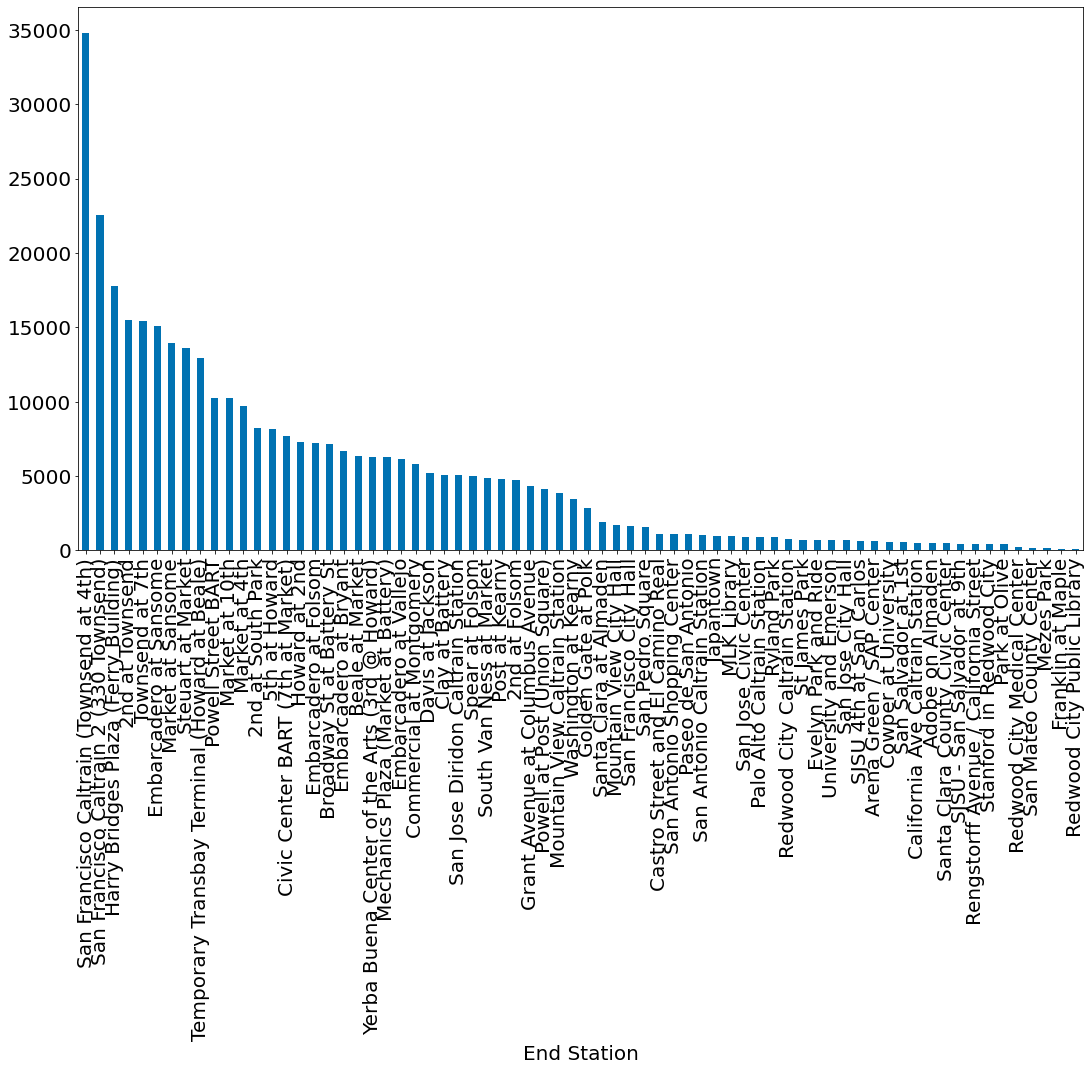

In [47]:
df.groupby('End Station').size().sort_values()[::-1].plot.bar()

## Para exploração futura

* `scipy.stats` contém funções *PDF* e *CDF* para a maioria das distribuições de probabilidade populares.
* Lembra-se de que eu disse que seria uma boa idéia estudar um livro de estatísticas? Também seria uma boa ideia estudar um livro de probabilidades. O melhor que eu sei que está disponível on-line é [Introdução à Probabilidade](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf).